自由なフェルミ粒子のグリーン関数は

\begin{equation}
G(i\omega_n)=\frac{1}{i\omega_n-\epsilon}
\tag{1}
\end{equation}

ただし$\omega_n$は松原振動数

$$\omega_n=\frac{\pi(2n+1)}{\beta}$$

である(nは自然数)  

$G(i\omega_n)$の実部と虚部それぞれを計算してグラフを描く（ただし $\epsilon=1$ とする）

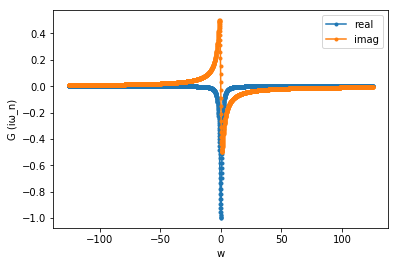

In [2]:
import numpy as np
from matplotlib import pyplot as plt
n_w = np.arange(-2000,2001)      # グラフに表示するnの範囲を設定
beta = 100                     #βの大きさを設定
w = np.pi*(2*n_w+1)/beta       # 松原周波数ω_nを定義
G_iw_ex = 1/(1j*w-1)              # G(iω_n)を定義(添え字exはExactの略)
plt.plot(w, G_iw_ex.real, label='real', marker='.')
plt.plot(w, G_iw_ex.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()


(1)式の分母を実数化すると
$$\begin{eqnarray}
(1) &=& \frac{i\omega_n+\epsilon}{(i\omega_n-\epsilon)(i\omega_n+\epsilon)} \\
&=& -\frac{i\omega_n+\epsilon}{\omega_n^2+\epsilon^2}
\end{eqnarray}$$
 
実部は偶関数であり $|\omega_n|\to\infty$ でゼロに、$\omega_n = 0$ で $-\frac{1}{\epsilon}$ （今は$\epsilon=1$なので$-1$）になっている。  
虚部は奇関数であり、$|\omega_n|>>1$ で $-\frac{1}{\omega_n}$ に漸近しゼロに、$\omega_n<<1$ で $-\frac{\omega_n}{\epsilon}$ に近づく。  
ゆえに、上の表示したグラフの振る舞いは正しそうである。
 
 
 
次に、(1)式のフーリエ級数をとって$\tau$表示のグリーン関数に変換する。
\begin{equation}
G(\tau)=\frac{1}{\beta}\sum_{n=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau}
\tag{2}
\end{equation}

しかし無限個の和をとることは実際上不可能なので、nの範囲を$\pm1000$までで打ち切る。  
すなわち

$$G(\tau)=\frac{1}{\beta}\sum_{n=-1000}^{1000}G(i\omega_n)e^{-i\omega_n\tau}$$

を計算してグラフを描く。

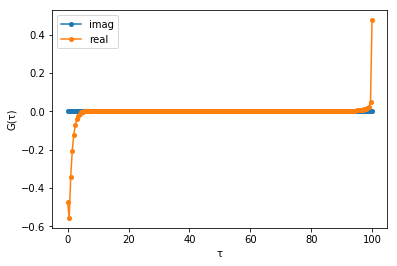

In [12]:
n_tau = 200
tau = np.linspace(0, beta, n_tau)            # τ=0からτ=βまでを100分割した配列tauを作成(プロットの幅の設定)
G_tau = np.zeros((n_tau,),dtype=np.complex)  # G(τ)を表す配列を作る。各要素はτの各点に対応。
for t in range(n_tau) :                          
    G_tau[t] = 0                             # G(τ)を初期化
    for n in range(len(n_w)) :                            # 各τの値に対して、フーリエ級数を計算
        G_tau[t] += G_iw_ex[n] * np.exp(-1j*w[n]*tau[t]) / beta
plt.plot(tau, G_tau.imag, label='imag', marker='.', ms=8)
plt.plot(tau, G_tau.real, label='real', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

(2)式の虚部は恒等的にゼロになっており、$G(\tau)$は実関数であることが結果のグラフより分かる。  
このことは(2)式に(1)式を代入したものから$G(\tau)^{*}=G(\tau)$が導けることから正しいことが確認できる。

今度は、(2)式を解析的に計算して$G(\tau)$の関数形を厳密に求めてみる。（やや大変）  
留数定理より(2)式を
$$\begin{eqnarray}
G(\tau)&=&\frac{1}{\beta}\sum_{n=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau} \\
&=&-\frac{1}{2\pi i}\int_{C}dz\frac{G(z)}{e^{-\beta z}+1}e^{-z\tau}
\tag{3}
\end{eqnarray}$$

と、書き換えることができる。
経路Cは虚軸側が左手になるように虚軸を1周する経路である。（阿部龍蔵の「統計力学」9章を参照）  
虚軸まわりの留数でなく、実軸まわりの留数（$z=\epsilon$しかない）をとることで(3)の複素積分を実行すると

$$\begin{eqnarray}
G(\tau)&=&-\lim_{z\to\epsilon} (z-\epsilon)\frac{G(z)}{e^{-\beta z}+1}e^{-z\tau} \\
&=&-\lim_{z\to\epsilon}\frac{1}{e^{-\beta z}+1}e^{-z\tau} \\
&=&-\frac{e^{-\tau\epsilon}}{e^{-\beta\epsilon}+1}
\tag{4}
\end{eqnarray}$$

となる。一見すると、これで厳密な関数形が求まったように思える。  

しかしここで、(3)式が

$$G(\tau)=\frac{1}{2\pi i}\int_{C}dz\frac{G(z)}{e^{\beta z}+1}e^{-z\tau}$$

でもよかったということに注目。つまり、(3)式の被積分関数の分母の $e^{-\beta z}$ は $e^{\beta z}$ でもよく、ただしそのようにすると虚軸上の留数の符号が反転するので、全体の符号を反転させているということ。  
この場合の(4)式に相当する結果は

$$\begin{equation}
G(\tau)=\frac{e^{-\tau\epsilon}}{e^{\beta\epsilon}+1}
\tag{5}
\end{equation}$$


となる。(4)式を$e^{-\beta\epsilon}\to e^{\beta\epsilon}$と置き換えて全体の符号を反転しただけ。  
 
このように(2)式を満たす$G(\tau)$の解として(4)式と(5)式の2つの候補が見つかった。  
しかし、(2)式の右辺の計算は一意に定まるはずなので2つとも解ということはない。そこで、(2)式より自明な次の性質
$$\begin{eqnarray}
\tag{6}
G(\tau+2\beta) = G(\tau)  \\
\tag{7}
G(\tau+\beta) = -G(\tau)
\end{eqnarray}$$
この周期性と反周期性を満たすように解を構成する。※(4)式と(5)式はこれらを満たしていない。
(4)を $\beta$ だけ進めると
$$\begin{eqnarray}
G(\tau+\beta) &=& -\frac{e^{-(\tau+\beta)\epsilon}}{e^{-\beta\epsilon}+1} \\
&=& -\frac{e^{-\tau\epsilon}e^{-\beta\epsilon}}{e^{-\beta\epsilon}+1} \\
&=& -\frac{e^{-\tau\epsilon}}{e^{\beta\epsilon}+1} = -(5)
\end{eqnarray}$$
と、(5)式を符号反転したものに一致する。  
よって、任意定数 $c$ に対して $c-\beta<=\tau<=c+\beta$ の範囲での関数形を
$$
G(\tau) = \left\{\begin{array}{}
(4) & (c-\beta < \tau < c) \\
(5) & (c < \tau < c+\beta)
\tag{8}
\end{array} \right. $$
と定めると$G(\tau)$は反周期性(7)を満たす。さらに周期性(6)も満たすように、(8)を周期的拡張する。  
そして
$$c=0+2\beta m ~~ (m=0,\pm1,\pm2,\cdots)$$
 
としたものが求める解である。（$C$がなぜこうなるかの説明はまだ見つかってない）


今回は
$0 < \tau < \beta$ までの範囲を比較する。この範囲での$G(i\omega)$は(4)式。  
これを$\epsilon=1$として近似的に求めたものと比較する。

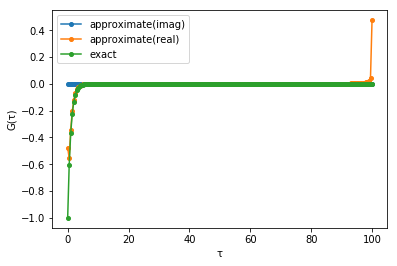

In [13]:
G_tau_ex = -np.exp(-tau)/(np.exp(-beta)+1)           # 添え字exはExactの略。
plt.plot(tau, G_tau.imag, label='approximate(imag)', marker='.', ms=8) 
plt.plot(tau, G_tau.real, label='approximate(real)', marker='.', ms=8) 
plt.plot(tau, G_tau_ex, label='exact', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

近似的に求めたものは厳密なものに比べてずれている。オレンジと緑が合ってない。  
(1)式は $n\to\infty$ or $n\to-\infty$ の極限で

$$G(i\omega_n)\sim\frac{1}{i\omega_n}\to0$$

である。  
さらに収束性を良くするために

$$\Delta G(i\omega_n)\equiv G(i\omega_n)-\frac{1}{i\omega_n}$$

を定義する。  
定義式の第二項は$G(i\omega_n)$をべき展開した1次の項を打ち消すから  
$n\to\infty$ or $n\to-\infty$ の極限で  

$$\Delta G(\tau)\to(\frac{1}{i\omega_n})^2\to0$$

と、2次の速さで収束する。(さっきは1次だったのでそれより速い。)  
これによりフーリエ級数(2)式を

$$\begin{eqnarray}
G(\tau)&=&\frac{1}{\beta}\sum_{n=-\infty}^{\infty}G(i\omega_n)e^{-i\omega_n\tau} \\
&=&\frac{1}{\beta}\sum_{n=-\infty}^{\infty}(\Delta G(i\omega_n)+\frac{1}{i\omega_n})e^{-i\omega_n\tau} \\
&=&\frac{1}{\beta}\sum_{n=-\infty}^{\infty}\Delta G(i\omega_n)e^{-i\omega_n\tau}-\frac{1}{2}
\end{eqnarray}$$

と、より収束性のよい形に書き直せる。  
さっきと同じ和の範囲（$n=-100\sim100$）で、これを計算してグラフを描いてみる。

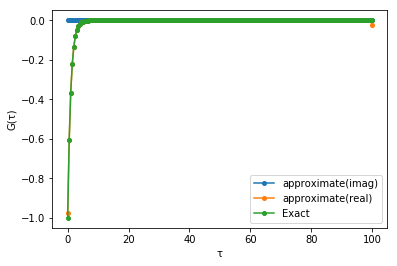

In [15]:
G_tau_new = np.empty((n_tau,),dtype=np.complex)
for t in range(n_tau) :
    G_tau_new[t] = 0
    for n in range(len(n_w)) :
        dG = G_iw_ex[n]- 1/(1j*w[n])                         # ΔG(iω_n)を定義
        G_tau_new[t] += dG * np.exp(-1j*w[n]*tau[t]) / beta    # 各τの値に対して、フーリエ級数を計算
G_tau_new = G_tau_new - 1/2                               # G(τ)を-1/2する。
plt.plot(tau, G_tau_new.imag, label='approximate(imag)', marker='.', ms=8)
plt.plot(tau, G_tau_new.real, label='approximate(real)', marker='.', ms=8)
plt.plot(tau, G_tau_ex, label='Exact', marker='.', ms=8)
plt.xlabel('τ')
plt.ylabel('G(τ)')
plt.legend()
plt.show()

今度は逆変換
 
$$G(i\omega_n) = \int_{0}^{\beta}d\tau G(\tau)e^{i\omega_n\tau}$$
 
をしてみる。  
さっきのフーリエ級数の解析計算はやや面倒だったが、その逆変換であるこの計算はとても簡単で
 
$$\begin{eqnarray}
\tag{5}
G(i\omega_n) &=& \int_{0}^{\beta}d\tau \left(-\frac{e^{-\tau\epsilon}}{e^{-\beta\epsilon}+1}\right)e^{i\omega_n\tau}  \\
&=& -\frac{1}{i\omega_n-\epsilon}\frac{1}{e^{-\beta\epsilon}+1}\left[e^{(i\omega_n-\epsilon)\tau}\right]_{\tau=0}^{\tau=\beta}  \\
&=& -\frac{1}{i\omega_n-\epsilon}\frac{-e^{-\beta\epsilon}-1}{e^{-\beta\epsilon}+1}  \\
&=& \frac{1}{i\omega_n-\epsilon}
\end{eqnarray}$$
となる。  
(5)の積分を今度は数値的に実行すると(ただし$\epsilon=1$とする)

In [4]:
import my_int

help(my_int.int_trapz)

y_aの積分誤差 0.020000000000000094
y_bの積分誤差 0.0001333333333335407
y_cの積分誤差 0.020000000000000018
y_aの積分誤差 9.367506770274758e-17
y_bの積分誤差 0.0001333333333335407
y_cの積分誤差 1.734723475976807e-17
y_1の積分誤差： -3.469446951953614e-18
y_2の積分誤差： 0.0001360405400810949
y_3の積分誤差： 1.0408340855860843e-17
y_aの積分誤差： 3.642919299551295e-17
y_bの積分誤差： 1.3741468695149806e-06
y_cの積分誤差： -1.9081958235744878e-17
y_aの積分誤差： 6.838893860458918e-17
y_bの積分誤差： 1.1102230246251565e-16
y_cの積分誤差： -5.843001479524177e-18
y_1の積分誤差： -1.371515748194163e-16


/mnt/c/Users/神里友一/iCloudDrive/Python_file/my_int.py:247: RuntimeWarning: overflow encountered in cosh
  result += np.pi/2*dx*func(np.tanh(sh))*np.cosh(i*dx)/(np.cosh(sh)**2)
/mnt/c/Users/神里友一/iCloudDrive/Python_file/my_int.py:247: RuntimeWarning: overflow encountered in double_scalars
  result += np.pi/2*dx*func(np.tanh(sh))*np.cosh(i*dx)/(np.cosh(sh)**2)


y_2の積分誤差： -6.328271240363392e-15
y_3の積分誤差： -1.973247953923618e-17
Help on function int_trapz in module my_int:

int_trapz(func, a, b, n)
    int_trapz(func,a,b,n)
    渡された関数funcを台形則で数値積分した結果を返す。
    a,bはそれぞれ積分の下端と上端。nは分割数。



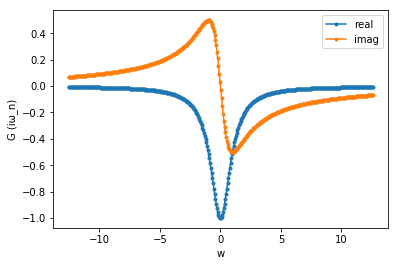

In [20]:
# 台形積分
G_iw = np.empty((len(n_w),),dtype=np.complex)
for n in range(len(n_w)) :
    func = lambda t : (-np.exp(-t)/(np.exp(-beta)+1)*np.exp(1j*w[n]*t))
    G_iw[n] = my_int.int_trapz(func,0,beta,1000)
    
plt.plot(w, G_iw.real, label='real', marker='.')
plt.plot(w, G_iw.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('G (iω_n)')
plt.legend()
plt.show()

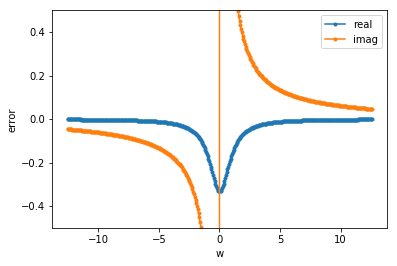

In [39]:
plt.plot(w, G_iw_ex.real - G_iw.real, label='real', marker='.')
plt.plot(w, G_iw_ex.imag - G_iw.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('error')
plt.ylim([-0.5,0.5])
plt.legend()
plt.show()

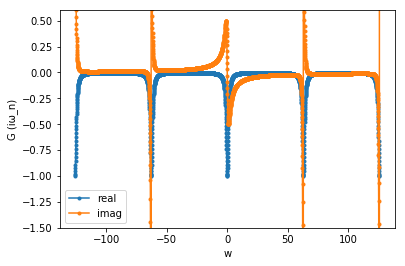

In [5]:
# 補正後
G_iw_new = np.empty((len(n_w),),dtype=np.complex)
for n in range(len(n_w)) :
    func = lambda t : (-np.exp(-t)/(np.exp(-beta)+1)+1/2)*np.exp(1j*w[n]*t)
    G_iw_new[n] = my_int.int_trapz(func,0,beta,1000) + 1/(1j*w[n])
    
plt.plot(w, G_iw_new.real, label='real', marker='.')
plt.plot(w, G_iw_new.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('G (iω_n)')
plt.ylim([-1.5,0.6])
plt.legend()
plt.show()

最初に表示した厳密なものとの差
$$G_{厳密}(i\omega_n) - G_{数値積分}(i\omega_n)$$
を計算してみる。

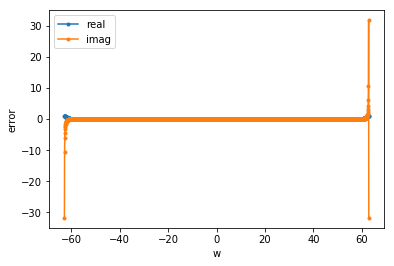

In [57]:
plt.plot(w, G_iw_ex.real - G_iw_new.real, label='real', marker='.')
plt.plot(w, G_iw_ex.imag - G_iw_new.imag, label='imag', marker='.')
plt.xlabel('w')
plt.ylabel('error')
plt.legend()
plt.show()

$|\omega_n|$が大きいところで、誤差が発生していることが見て取れる。

In [ ]:
%quickref

In [ ]:
K=2
def a():
    aa =1
    def b():
        print(aa)
        bb =2
        print(locals())
        def c():
            d=1
            pass
    b()
a()